In [1]:
from taxi import TaxiEnv
import numpy as np
#create a single game instance
env = TaxiEnv()

#start new game
env.reset();

#### Видно, что такси понимает, что если ему стоять на месте или просто ходить, не подбирая пассажира, то оно получит наибольшую награду, так что придётся поменять систему, по которой такси плучает награду

In [2]:
from taxi_upgraded import TaxiEnvUpgr

In [3]:
env = TaxiEnvUpgr()

In [4]:
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

None


In [5]:
import numpy as np
n_states = env.observation_space.n
n_actions = env.action_space.n
def get_random_policy():
    """
    Build a numpy array representing agent policy.
    This array must have one element per each of 16 environment states.
    Element must be an integer from 0 to 3, representing action
    to take from that state.
    """
    return np.random.randint(0, n_actions, n_states)

In [6]:
def sample_reward(env, policy, t_max=100):
    """
    Interact with an environment, return sum of all rewards.
    If game doesn't end on t_max (e.g. agent walks into a wall), 
    force end the game and return whatever reward you got so far.
    Tip: see signature of env.step(...) method above.
    """
    s = env.reset()
    total_reward = 0

    for ind in range(t_max):
        action = policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
    return total_reward

In [7]:
def evaluate(env, policy, n_times=100, t_max=100):
    """Run several evaluations and average the score the policy gets."""
    rewards = []
    for _ in range(n_times):
        rewards.append(sample_reward(env, policy, t_max))
    return float(np.mean(np.array(rewards)))      

In [8]:
def crossover(policy1, policy2, p=0.5):
    """
    for each state, with probability p take action from policy1, else policy2
    """
    cross_policy = []
    
    return np.choose(np.random.choice(np.array([0, 1]), 
                     size = policy1.shape, 
                     p = [p, 1-p]),
                     choices=[policy1, policy2])

In [9]:
def mutation(policy, p=0.1):
    """
    for each state, with probability p replace action with random action
    Tip: mutation can be written as crossover with random policy
    """
#     <your code>
    return crossover(get_random_policy(), policy, p)
    

In [10]:
n_epochs = 100 #how many cycles to make
pool_size = 100 #how many policies to maintain
n_crossovers = 50 #howuuu many crossovers to make on each step
n_mutations = 50 #how many mutations to make on each tick

In [11]:
print("initializing...")
pool = [get_random_policy() for _ in range(pool_size)]
pool_scores = [sample_reward(env, policy) for policy in pool]


initializing...


In [12]:
from tqdm import tqdm
from random import choice
epoch_scores = []

In [14]:
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

In [15]:
file = pd.DataFrame(columns=["epochs", "pool_size", "cross", "mut", "score", "isdone", "steps_num", "policy"])    

In [ ]:
for step_num in [75]:
    print("it works!!!")
    for epoch in tqdm(range(n_epochs)):
        print("Epoch %s:"%epoch)
        print("it works!!!")

        crossovered = [crossover(choice(pool), choice(pool)) 
                       for _ in range(n_crossovers)]
        mutated = [mutation(crossovered[choice(range(len(crossovered)))]) for _ in range(n_mutations)]
        assert type(crossovered) == type(mutated) == list

        pool = pool + crossovered + mutated
        pool_scores = [evaluate(env, policy, step_num) for policy in pool]
        selected_indices = np.argsort(pool_scores)[-pool_size:]
        pool = [pool[i] for i in selected_indices]
        pool_scores = [pool_scores[i] for i in selected_indices]

        print("best score:", pool_scores[-1])
        epoch_scores.append(pool_scores[-1])
        
    plt.plot(range(len(epoch_scores)), epoch_scores)
    plt.show()
    first_best_policy = pool[-1]
    s = env.reset()
    total_reward = 0
    step_num = 0
    for ind in range(100):
        action = first_best_policy[s]
        s, reward, is_done, _ = env.step(action)
        total_reward += reward
        if (is_done):
            break
        step_num += 1 
    file = file.append(pd.Series({"epochs":n_epochs, "pool_size":pool_size, "cross":n_crossovers, "mut":n_mutations, 
                                  "score":pool_scores[-1], "isdone":is_done, "steps_num":step_num, "policy":pool[-1]}), 
                               ignore_index=True )
    file.head()
    file.to_csv("results_other.csv")

it works!!!



  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

Epoch 0:
it works!!!
best score: -762.2533333333333


In [ ]:
print("hello")

In [25]:
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

In [26]:
file = pd.DataFrame(columns=["epochs", "pool_size", "cross", "mut", "score", "isdone", "steps_num", "policy"])    

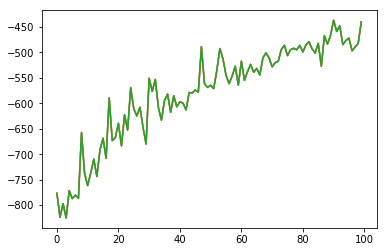

In [28]:
plt.plot(range(len(epoch_scores)), epoch_scores)
plt.show()
first_best_policy = pool[-1]
s = env.reset()
total_reward = 0
step_num = 0
for ind in range(100):
    action = first_best_policy[s]
    s, reward, is_done, _ = env.step(action)
    total_reward += reward
    if (is_done):
        break
    step_num += 1 
file = file.append(pd.Series({"epochs":n_epochs, "pool_size":pool_size, "cross":n_crossovers, "mut":n_mutations, 
                              "score":pool_scores[-1], "isdone":is_done, "steps_num":step_num, "policy":pool[-1]}), 
                           ignore_index=True )
file.head()
file.to_csv("results.csv")

In [ ]:
print("hello")

Ссылка на фидбек по семинару: [link](https://docs.google.com/forms/d/e/1FAIpQLSf-08wFrEke6zKlysETYiqAjH5CRXtOKut5Q77Tr5rdVId7zA/)

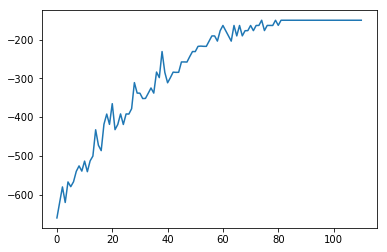

In [25]:
plt.plot(range(len(epoch_scores)), epoch_scores)
first_best_policy = pool[-1]

In [40]:
s = env.reset()
total_reward = 0
step_num = 0

In [41]:
for ind in range(100):
    action = first_best_policy[s]
    s, reward, is_done, _ = env.step(action)
    total_reward += reward
    if (is_done):
        break
    step_num += 1

In [42]:
print(is_done)

False
